# Emissions and Production

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This preliminary exploratory analysis will examine the relationship between CO2 emissions and level of production in countries. 

## Data Cleaning

In [5]:
co2 = pd.read_csv('../data/raw-data/our-world-in-data/co2-emissions-vs-gdp.csv')
co2

,Entity,Code,Year,Annual CO2 emissions (per capita),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.0019,NaN,NaN,7624058.0,NaN
2,Afghanistan,AFG,1950,0.0109,1156.0,NaN,7480464.0,NaN
3,Afghanistan,AFG,1951,0.0117,1170.0,NaN,7571542.0,NaN
4,Afghanistan,AFG,1952,0.0115,1189.0,NaN,7667534.0,NaN
...,...,...,...,...,...,...,...,...
62416,Zimbabwe,ZWE,1900,NaN,NaN,NaN,1098134.0,NaN
62417,Zimbabwe,ZWE,1901,NaN,NaN,NaN,1113327.0,NaN
62418,Zimbabwe,ZWE,1902,NaN,NaN,NaN,1130128.0,NaN
62419,Zimbabwe,ZWE,2021,NaN,NaN,NaN,15993525.0,NaN


Our first Rosling Plot will focus on the latest year of data: 2018. Hence, we select only the rows where 'Year' = 2018.

In [6]:
co2_2018 = co2[co2["Year"] == 2018]
co2_2018

,Entity,Code,Year,Annual CO2 emissions (per capita),GDP per capita,417485-annotations,Population (historical estimates),Continent
70,Afghanistan,AFG,2018,0.2245,1934.555054,NaN,3.668679e+07,NaN
394,Africa,NaN,2018,1.0865,NaN,NaN,1.295265e+09,NaN
605,Albania,ALB,2018,1.6422,11104.166016,NaN,2.877019e+06,NaN
881,Algeria,DZA,2018,3.8241,14228.025391,NaN,4.192701e+07,NaN
1148,American Samoa,ASM,2018,NaN,NaN,NaN,4.844500e+04,NaN
...,...,...,...,...,...,...,...,...
61506,World,OWID_WRL,2018,4.8022,15212.415039,NaN,7.683790e+09,NaN
61611,Yemen,YEM,2018,0.3503,2284.889893,NaN,3.079051e+07,NaN
61900,Yugoslavia,OWID_YGS,2018,NaN,16558.312500,NaN,NaN,NaN
61969,Zambia,ZMB,2018,0.4215,3534.033691,NaN,1.783590e+07,NaN


Now, let's consider what we would like to plot for year 2018: the x-axis should be GDP per capita; the y-axis could be a new column: Total Emissions, made by the product of Per Capita $CO_2$ emissions and the total population of each country.

In [8]:
# create a column for total emissions
co2_2018["Total emissions"] = co2_2018['Annual CO2 emissions (per capita)'] * co2_2018['Population (historical estimates)']
co2_2018

C:\Users\Yiyan\AppData\Local\Temp/ipykernel_42328/3674999517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_2018["Total emissions"] = co2_2018['Annual CO2 emissions (per capita)'] * co2_2018['Population (historical estimates)']


,Entity,Code,Year,Annual CO2 emissions (per capita),GDP per capita,417485-annotations,Population (historical estimates),Continent,Total emissions
70,Afghanistan,AFG,2018,0.2245,1934.555054,NaN,3.668679e+07,NaN,8.236184e+06
394,Africa,NaN,2018,1.0865,NaN,NaN,1.295265e+09,NaN,1.407306e+09
605,Albania,ALB,2018,1.6422,11104.166016,NaN,2.877019e+06,NaN,4.724641e+06
881,Algeria,DZA,2018,3.8241,14228.025391,NaN,4.192701e+07,NaN,1.603331e+08
1148,American Samoa,ASM,2018,NaN,NaN,NaN,4.844500e+04,NaN,NaN
...,...,...,...,...,...,...,...,...,...
61506,World,OWID_WRL,2018,4.8022,15212.415039,NaN,7.683790e+09,NaN,3.689910e+10
61611,Yemen,YEM,2018,0.3503,2284.889893,NaN,3.079051e+07,NaN,1.078592e+07
61900,Yugoslavia,OWID_YGS,2018,NaN,16558.312500,NaN,NaN,NaN,NaN
61969,Zambia,ZMB,2018,0.4215,3534.033691,NaN,1.783590e+07,NaN,7.517831e+06


Select relevant columns and filter for country only rows. 

In [33]:
co2_main = co2_2018[["Entity", "Code", "Total emissions", "Annual CO2 emissions (per capita)", "GDP per capita", "Population (historical estimates)"]]
co2_main = co2_main.dropna()
co2_main = co2_main[~co2_main["Entity"].isin(['World', 'Asia', 'Europe', 'Africa', 'North America', 'Latin America', 'Oceania'])]
co2_main

,Entity,Code,Total emissions,Annual CO2 emissions (per capita),GDP per capita,Population (historical estimates)
70,Afghanistan,AFG,8.236184e+06,0.2245,1934.555054,36686788.0
605,Albania,ALB,4.724641e+06,1.6422,11104.166016,2877019.0
881,Algeria,DZA,1.603331e+08,3.8241,14228.025391,41927008.0
1479,Angola,AGO,2.474362e+07,0.7912,7771.441895,31273538.0
2185,Argentina,ARG,1.813140e+08,4.0824,18556.382812,44413592.0
...,...,...,...,...,...,...
60638,Venezuela,VEN,1.240807e+08,4.1602,10709.950195,29825652.0
60916,Vietnam,VNM,2.222419e+08,2.3415,6814.142090,94914328.0
61611,Yemen,YEM,1.078592e+07,0.3503,2284.889893,30790514.0
61969,Zambia,ZMB,7.517831e+06,0.4215,3534.033691,17835898.0


## Visualization

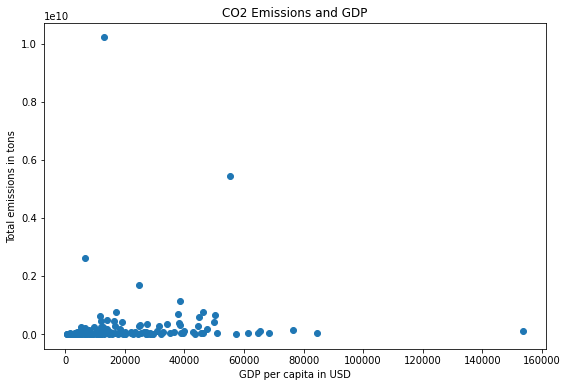

In [39]:
plt.figure(figsize=(9, 6))
plt.scatter(co2_main['GDP per capita'], co2_main['Total emissions'])
plt.xlabel("GDP per capita in USD")
plt.ylabel("Total emissions in tons")
plt.title("CO2 Emissions and GDP")
plt.show()

This plot is hard to read, and is dominated by a few outliers (large emitters and very wealthy nations). Hence, let us take the log of each axis. Percentage changes in GDP per capita should now refer to percentage changes in total emissions in each country.

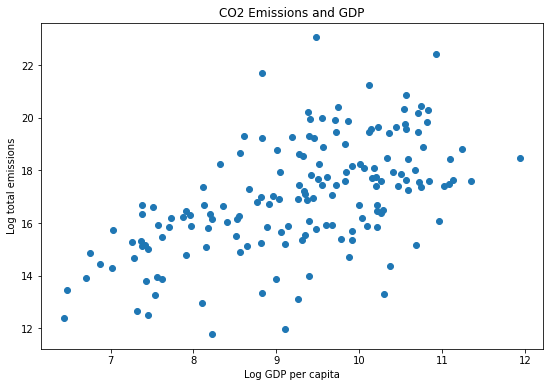

In [40]:
plt.figure(figsize=(9, 6))
plt.scatter(np.log(co2_main['GDP per capita']), np.log(co2_main['Total emissions']))
plt.xlabel("Log GDP per capita")
plt.ylabel("Log total emissions")
plt.title("CO2 Emissions and GDP")
plt.show()

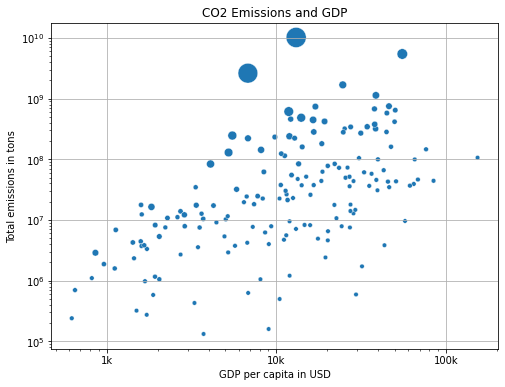

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = co2_main, x = 'GDP per capita', y = 'Total emissions', 
                size = 'Population (historical estimates)', 
                sizes=(20,400), legend=False);
plt.xscale('log')
plt.yscale('log')
plt.xlabel("GDP per capita in USD")
plt.ylabel("Total emissions in tons")
plt.title("CO2 Emissions and GDP")
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.grid()
plt.show();